<center><br><font size=10>Final Project</font><br>
<br><br>
<b>Introduction to Machine Learning – Digital Sciences for High-Tech</b>
<br><br>
<b>Author</b>: Asaf Biniamini & Guy Maoz
<br><i>Spring 2023</i> </center>

<center>
<font size=6>pre-processing</font>
</center>

## Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from typing import List, Dict
from scipy import stats
import time
iqr_value = 3
%matplotlib inline

### Are there outliers in the data? If so, you must remove them or at least give explanation about it.

To determine if there are outliers in the data, we did the next steps:

a. Explore the data: Begin by gaining a general understanding of the data by examining its summary statistics, such as mean, median, standard deviation, minimum, and maximum values. This will give us a rough idea of the range and distribution of our features.

b. Visualize the data: Create visualizations like histograms, box plots, or scatter plots to visually identify any potential outliers. These plots can help us identify data points that deviate significantly from the majority of the data.

c. Analyze feature distributions: Examine the distribution of each feature individually to identify any unusual patterns or extreme values. Outliers can be identified as data points that fall far outside the range of the bulk of the data.

d. Use statistical techniques: Apply statistical methods like the Z-score or the interquartile range (IQR) to detect outliers. The Z-score measures how many standard deviations a data point is away from the mean, while the IQR measures the spread of data around the median. Data points that fall outside a certain threshold (e.g., 3 standard deviations for Z-score or 1.5 times the IQR) can be considered outliers.

Once we have identified the outliers, we have a few options:

Remove the outliers: If the outliers are due to measurement errors or data entry mistakes, we can choose to remove them from the dataset.

Transform the data: Instead of removing outliers, we can apply data transformation techniques like winsorization or log transformation to mitigate the impact of outliers on our model.

Treat outliers as a separate category: In some cases, outliers may contain valuable information or represent rare events. If that's the case, we can create a separate category or flag for outliers to be included in our analysis.


Summary statistics:
               size         vsize       imports       exports     has_debug  \
count  6.000000e+04  5.806500e+04  58261.000000  57907.000000  57073.000000   
mean   1.501019e+06  1.965704e+06    106.195671     30.803271      0.403764   
std    4.727391e+06  2.017881e+07    213.452315    508.079533      0.490655   
min    2.980000e+02  5.440000e+02      0.000000      0.000000      0.000000   
25%    1.070080e+05  1.228800e+05      1.000000      0.000000      0.000000   
50%    4.833280e+05  4.218880e+05     28.000000      0.000000      0.000000   
75%    1.239326e+06  1.601536e+06    152.000000      0.000000      1.000000   
max    3.253537e+08  4.278288e+09  15047.000000  48840.000000      1.000000   

       has_relocations  has_resources  has_signature       has_tls  \
count     56676.000000   58039.000000   58063.000000  57102.000000   
mean          0.543069       0.860456       0.254189      0.234195   
std           0.498146       0.346516       0.435408      

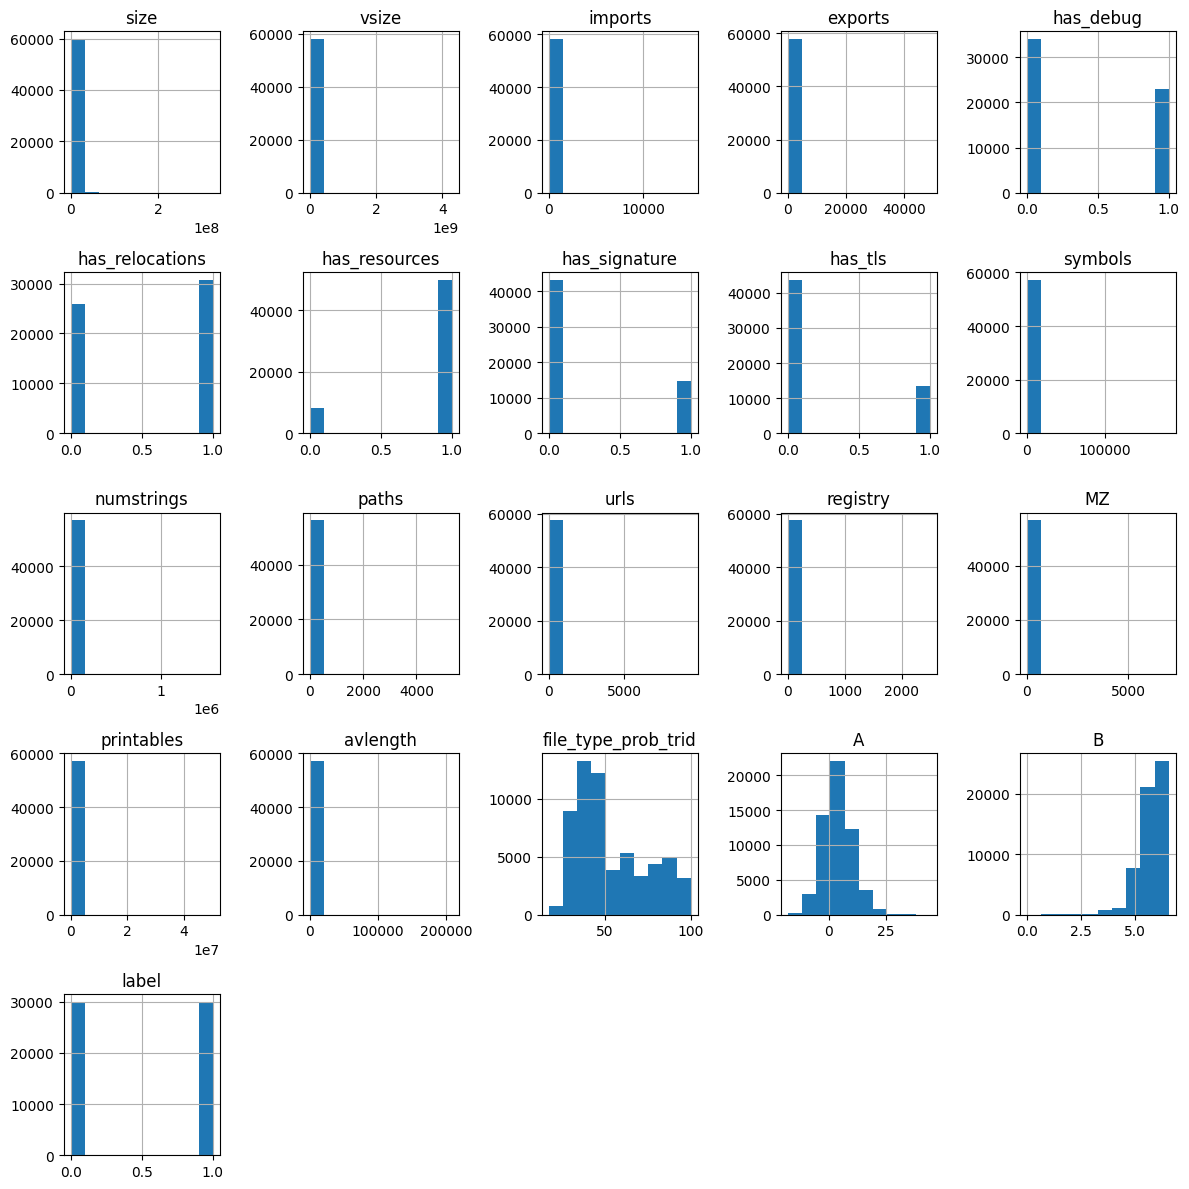

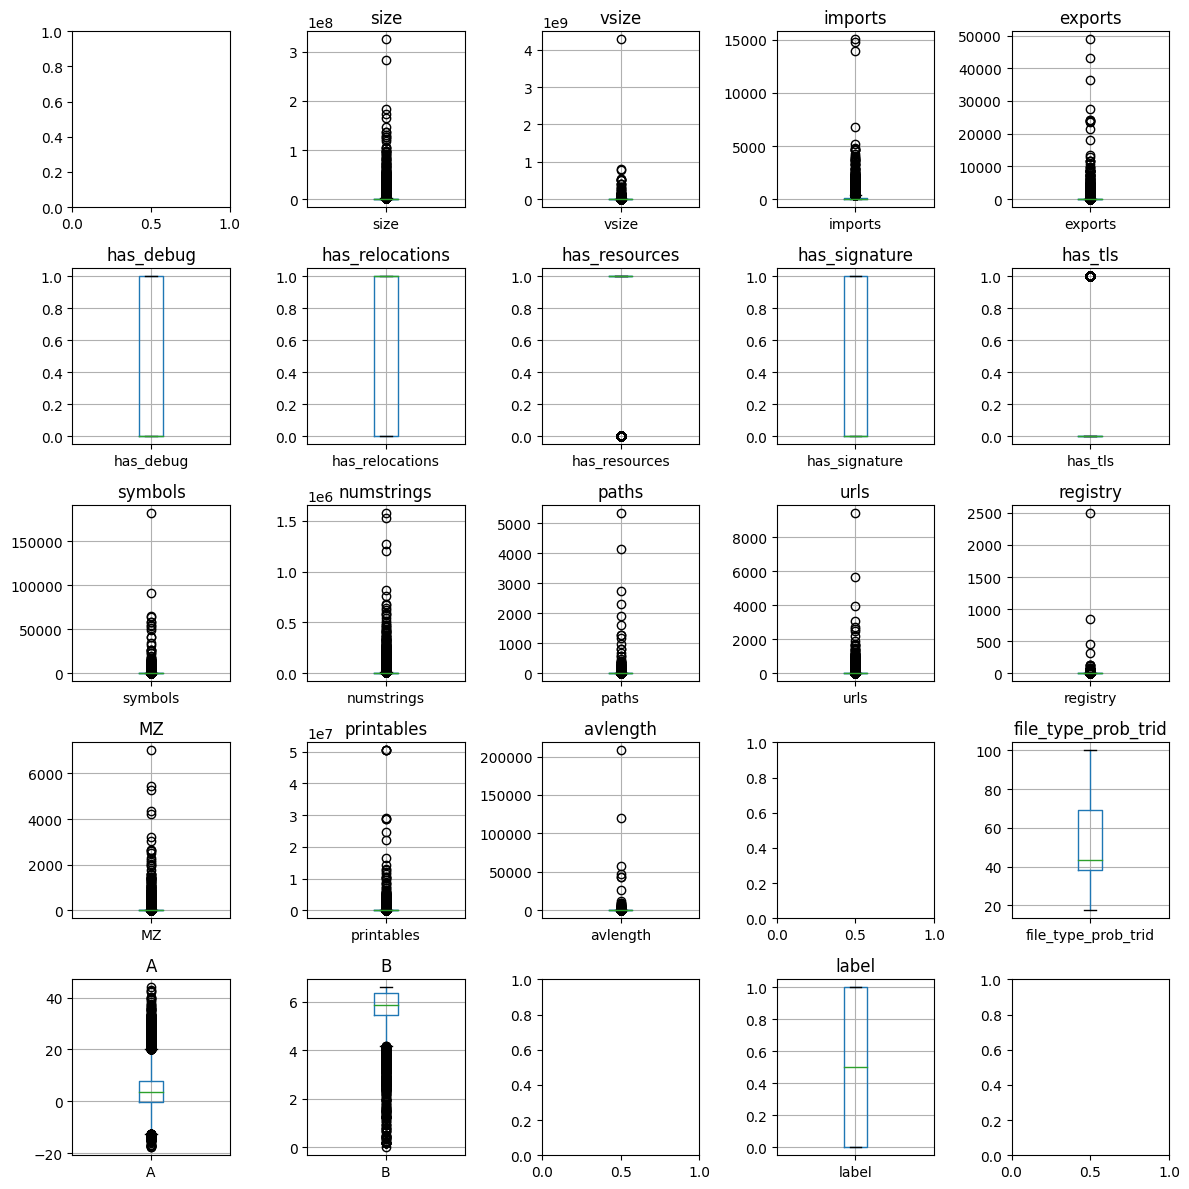

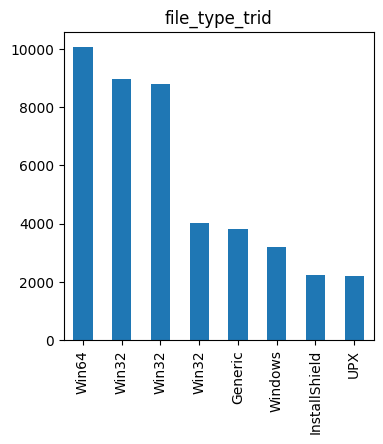

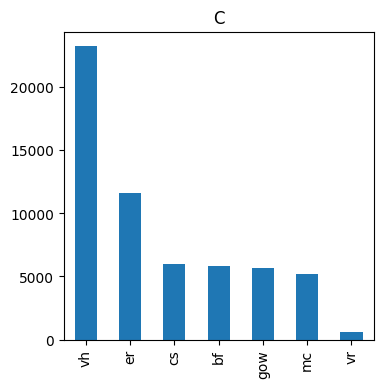

Number of outliers detected: 31926
Number of data points after handling outliers: 28074
Runtime: 6.84 seconds


In [21]:
t0 = time.time() # for Runtime measurement


# Load the data
data = pd.read_csv("train.csv")
X, y = data.values[:, :-1], data.values[:, -1]

# Step 1: Explore the data
print("Summary statistics:")
print(data.describe())

# Step 2: Visualize the data
data.drop(["sha256", "file_type_trid", "C"], axis=1).hist(figsize=(12, 12))
plt.tight_layout()
plt.show()
 
# Step 3: Analyze feature distributions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    if column != "sha256" and column != "file_type_trid" and column != "C":
        data.boxplot(column=[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        
plt.tight_layout()
plt.show()
        
        
feature_file_type_trid_counts = data["file_type_trid"].value_counts()
top_categories = feature_file_type_trid_counts[:8]
top_categories.index = top_categories.index.str.split().str[0]  # Extracting the first word of each string
top_categories.plot(kind="bar", figsize=(4, 4))
plt.title("file_type_trid")
plt.show()



feature_C_counts = data["C"].value_counts()
feature_C_counts.plot(kind="bar", figsize=(4, 4))
plt.title("C")
plt.show()

# Step 4: Use statistical techniques (IQR method)
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns].copy()

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - iqr_value * IQR
upper_threshold = Q3 + iqr_value * IQR

outliers = ((numeric_data < lower_threshold) | (numeric_data > upper_threshold)).any(axis=1)

# Remove outliers
clean_data = data[~outliers]

# Print the number of outliers detected
num_outliers = outliers.sum()
print("Number of outliers detected:", num_outliers)

# Print the number of data points after handling outliers
num_data_points = len(clean_data)
print("Number of data points after handling outliers:", num_data_points)



'''
# Step 4: Use statistical techniques (Z-score)
z_scores = np.abs(stats.zscore(X))
threshold = 3  # Set your threshold for outliers here
outliers = np.where(z_scores > threshold)

# Step 5: Handle outliers
# Remove outliers
clean_X = X[(z_scores < threshold).all(axis=1)]
clean_y = y[(z_scores < threshold).all(axis=1)]

# Transform outliers (Winsorization)
winsorized_X = np.where(z_scores > threshold, np.sign(X) * threshold, X)

# Print the number of outliers detected
print("Number of outliers detected:", len(outliers[0]))

# Print the number of data points after handling outliers
print("Number of data points after handling outliers:", len(clean_X))
'''

print(f'Runtime: {round(time.time()-t0,2)} seconds')

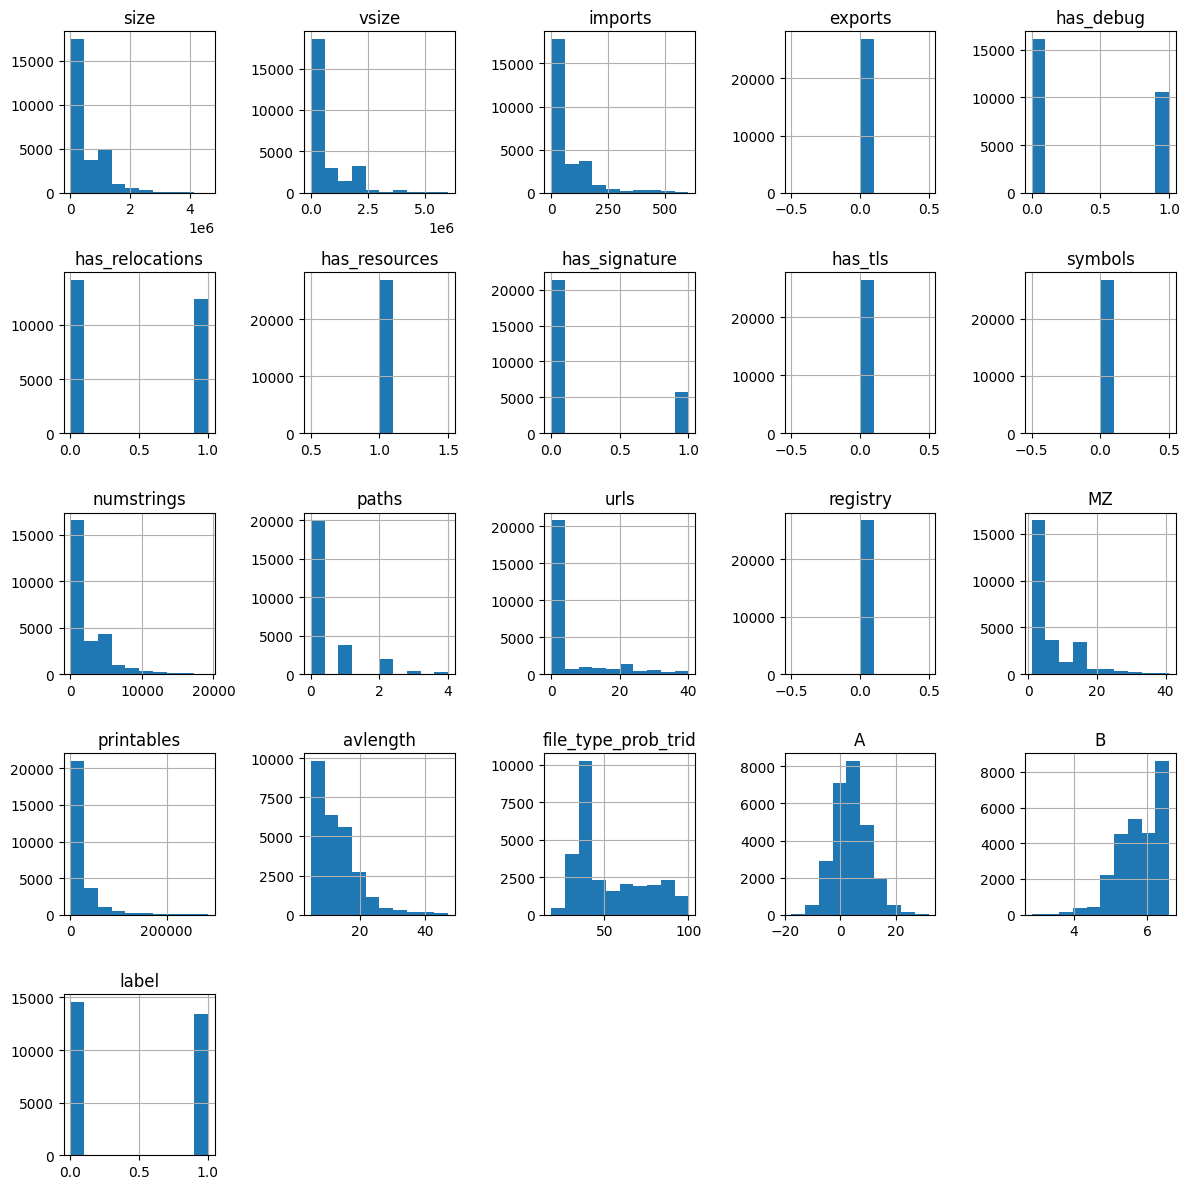

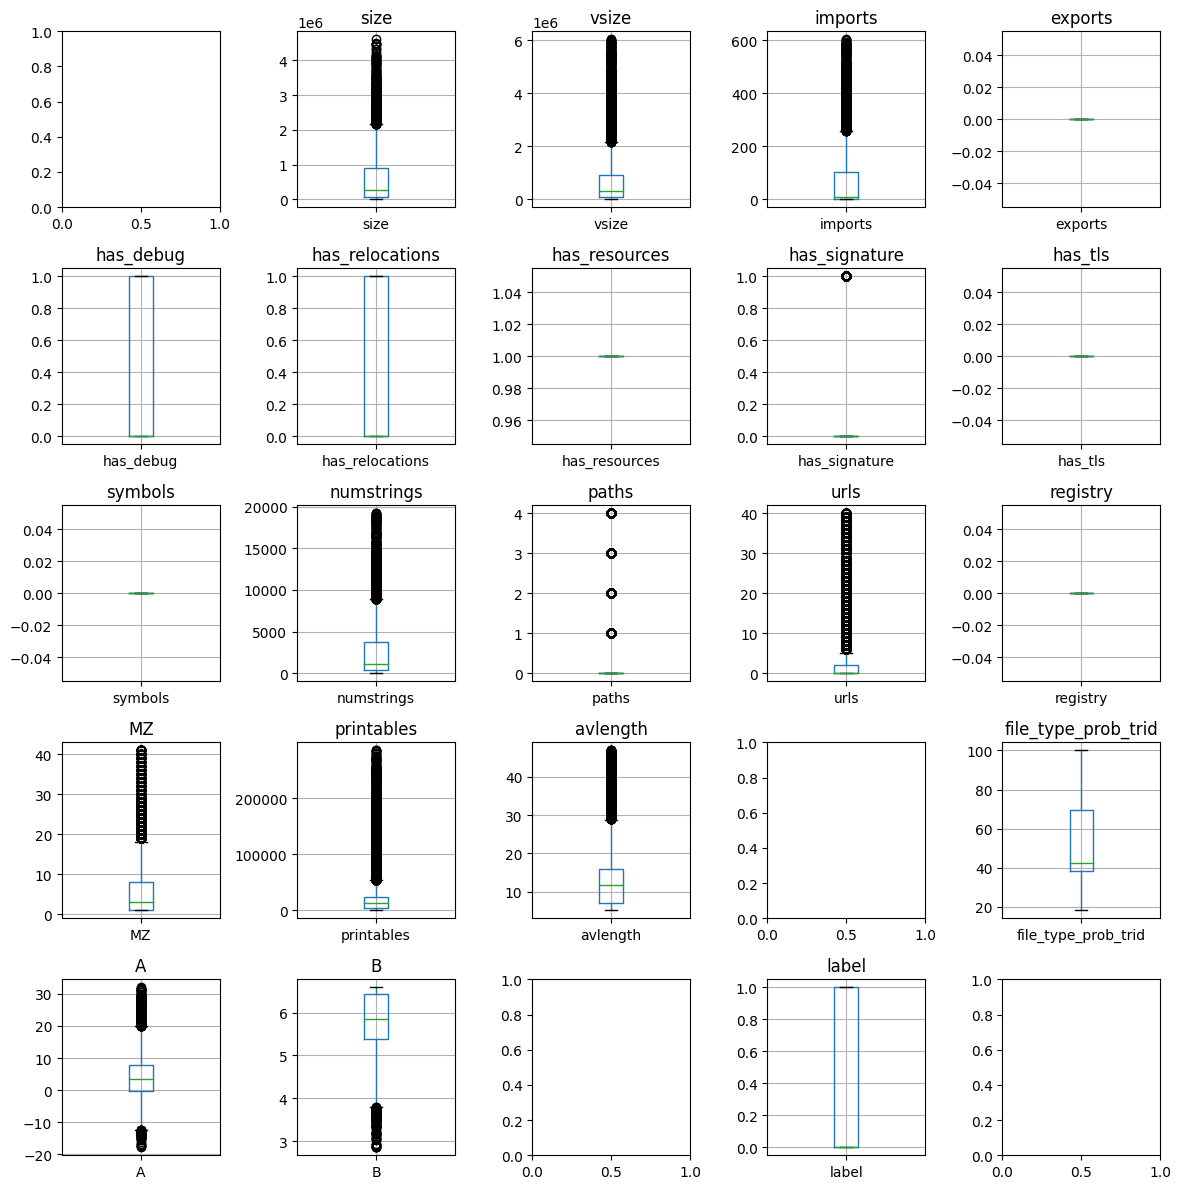

In [22]:
# Step 5: Visualize the data after removing outliers
clean_data.drop(["sha256", "file_type_trid", "C"], axis=1).hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(clean_data.columns):
    if column != "sha256" and column != "file_type_trid" and column != "C":
        clean_data.boxplot(column=[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")

plt.tight_layout()
plt.show()


we choose to use the IQR

### Is the data normalized? If not - should they be normalized? What is the importance of normalizing the data in the problem?

Normalization is the process of scaling numeric features to a standard range, typically between 0 and 1 or -1 and 1. Here are a few reasons why normalization is important in machine learning problems:

Equalizes the scales: Different features might have different scales, which can affect the performance of certain machine learning algorithms. By normalizing the data, we bring all features to a similar scale, ensuring that they contribute equally during the model training process.

Avoids dominance of certain features: When features have significantly different scales, those with larger scales can dominate the learning process and overshadow the influence of other features. Normalization prevents this dominance, allowing all features to contribute more equally to the model's learning process.

Improves convergence: Many optimization algorithms used in machine learning, such as gradient descent, converge faster on normalized data. Normalization helps to avoid oscillations and overshooting in the optimization process, leading to quicker convergence and more stable models.

Facilitates interpretation and comparison: Normalized data is easier to interpret and compare. The values are on a consistent scale, making it simpler to understand the impact of different features and compare their relative importance in the model.

In summary, normalizing the data can help improve the performance, stability, and interpretability of machine learning models by equalizing feature scales, avoiding dominance, facilitating convergence, and simplifying interpretation and comparison of feature importance.

In [23]:
#Normalization the Data

# Select the features to be normalized
features_to_normalize = clean_data.columns.drop(["sha256", "file_type_trid", "C"])

# Create a copy of the original DataFrame
data_normalized = clean_data.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize only the selected features
data_normalized[features_to_normalize] = scaler.fit_transform(data_normalized[features_to_normalize])

# Print the normalized DataFrame
print(data_normalized)


                                                  sha256      size     vsize  \
1      ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...  0.004624  0.007357   
4      59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...  0.085822  0.069864   
5      04c28622a87150c4760ccd9801d378c6e96373099bbe02...  0.094047  0.074620   
6      0021b1834cdef23a063058ecb9337e5ecafc1485944b46...  0.512031  0.395310   
9      f2b1a50f1c0088e56abc87c58fb7fb949f8bc0c69d406d...  0.002846  0.006677   
...                                                  ...       ...       ...   
59991  cd5e0bdab908b20cb5cb22c6a3b6572722ee2f7b58a7a7...  0.010271  0.035893   
59992  1ef1b3c78403e2dbe7d0313793e5ef0e8f08bd5c4e5bfd...  0.023507  0.020945   
59995  4511a131862a42b993277500b69e1694501873fc9504e5...  0.208336  0.343673   
59998  7ea972b22a4aa8f1ccf454279cafc69b0431e82be568a9...  0.023767  0.017548   
59999  7dc9c3c1035a77fa45371b50a1a4dfec995f608e5204a4...  0.026506  0.022984   

        imports  exports  has_debug  ha

In [27]:
#change str featurs with OneHotEncoder


# Create an instance of the OneHotEncoder with handle_unknown='error'
encoder = OneHotEncoder(handle_unknown='error')

# Fit and transform the training data
encoded_data = encoder.fit_transform(data_normalized[['file_type_trid', 'C']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['file_type_trid', 'C']))

# Concatenate the encoded DataFrame with the original data
data_encoded = pd.concat([data_normalized.drop(['file_type_trid', 'C'], axis=1), encoded_df], axis=1)
print(data_encoded)
'''print(data_normalized)
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the "file_type_trid" feature
file_type_encoded = encoder.fit_transform(data_normalized[['file_type_trid']])
file_type_categories = encoder.categories_[0]
file_type_encoded_df = pd.DataFrame(file_type_encoded, columns=[f'file_type_{c}' for c in file_type_categories])

# Fit and transform the "C" feature
C_encoded = encoder.fit_transform(data_normalized[['C']])
C_categories = encoder.categories_[0]
C_encoded_df = pd.DataFrame(C_encoded, columns=[f'C_{c}' for c in C_categories])

# Concatenate the encoded features with the original DataFrame
data_encoded = pd.concat([data_normalized, file_type_encoded_df, C_encoded_df], axis=1)

# Print the encoded data
print(data_encoded)


# Define the categorical features to be encoded
categorical_feature1 = 'file_type_trid'  
categorical_feature2 = 'C' 

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
data_normalized[categorical_feature1] = label_encoder.fit_transform(data_normalized[categorical_feature1])
data_normalized[categorical_feature2] = label_encoder.fit_transform(data_normalized[categorical_feature2])

print(data_normalized)'''

                                                  sha256      size     vsize  \
1      ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...  0.004624  0.007357   
4      59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...  0.085822  0.069864   
5      04c28622a87150c4760ccd9801d378c6e96373099bbe02...  0.094047  0.074620   
6      0021b1834cdef23a063058ecb9337e5ecafc1485944b46...  0.512031  0.395310   
9      f2b1a50f1c0088e56abc87c58fb7fb949f8bc0c69d406d...  0.002846  0.006677   
...                                                  ...       ...       ...   
28069                                                NaN       NaN       NaN   
28070                                                NaN       NaN       NaN   
28071                                                NaN       NaN       NaN   
28072                                                NaN       NaN       NaN   
28073                                                NaN       NaN       NaN   

        imports  exports  has_debug  ha

'print(data_normalized)\n# Initialize OneHotEncoder\nencoder = OneHotEncoder(sparse=False, handle_unknown=\'ignore\')\n\n# Fit and transform the "file_type_trid" feature\nfile_type_encoded = encoder.fit_transform(data_normalized[[\'file_type_trid\']])\nfile_type_categories = encoder.categories_[0]\nfile_type_encoded_df = pd.DataFrame(file_type_encoded, columns=[f\'file_type_{c}\' for c in file_type_categories])\n\n# Fit and transform the "C" feature\nC_encoded = encoder.fit_transform(data_normalized[[\'C\']])\nC_categories = encoder.categories_[0]\nC_encoded_df = pd.DataFrame(C_encoded, columns=[f\'C_{c}\' for c in C_categories])\n\n# Concatenate the encoded features with the original DataFrame\ndata_encoded = pd.concat([data_normalized, file_type_encoded_df, C_encoded_df], axis=1)\n\n# Print the encoded data\nprint(data_encoded)\n\n\n# Define the categorical features to be encoded\ncategorical_feature1 = \'file_type_trid\'  \ncategorical_feature2 = \'C\' \n\n# Create an instance of La

### Is the dimensionality of the problem too large? Why can large dimensionality create a problem? How will we recognize that the dimensions of the problem are too large?

The dimensionality of a problem refers to the number of features or variables in the dataset. When the dimensionality of the problem is too large, it can create several challenges and problems:

1. Curse of Dimensionality: As the number of features increases, the amount of data required to generalize accurately grows exponentially. This is known as the curse of dimensionality. With high-dimensional data, the data points become increasingly sparse, making it difficult to find meaningful patterns and relationships.

2. Increased Computational Complexity: High-dimensional data requires more computational resources and time to process, analyze, and build models. Algorithms and techniques that work well with low-dimensional data may become inefficient or even infeasible in high-dimensional spaces.

3. Overfitting: With a large number of features, there is an increased risk of overfitting, where a model learns noise or irrelevant patterns from the data, leading to poor generalization performance on unseen data. Overfitting occurs when the model becomes too complex relative to the available data.

4. Difficulty in Visualization: Visualizing data beyond three dimensions becomes challenging for humans. As the number of dimensions increases, it becomes nearly impossible to visualize and gain insights from the data using traditional plots and graphs.

To recognize that the dimensions of the problem are too large, you can consider the following indicators:

- High Dimensionality: If the number of features is much larger than the number of observations or samples, it suggests high dimensionality.
- Computational Constraints: If the computational resources (memory, processing power, etc.) required to handle the data become a limitation, it indicates large dimensionality.
- Overfitting and Poor Generalization: If the model performs well on the training data but poorly on the test or validation data, it may be a sign of overfitting caused by high dimensionality.
- Difficulty in Interpretation: If the relationships between variables become complex and difficult to interpret or explain, it suggests a large number of dimensions.

In such cases, dimensionality reduction techniques like Principal Component Analysis (PCA) or feature selection methods can be employed to reduce the number of features and address the challenges associated with high dimensionality.

In [40]:
def get_sigma_hat_squared(X: np.array, y: np.array) -> float:
    """
    Returns sigma_hat squared - an estimate of the noise variance sigma
    X: 2d np.array with the data.
    y: labels
    return: float - the sigma hat squared.
    """
    LrModel = LinearRegression()
    LrModel.fit(X, y)
    RSS = np.sum((y - LrModel.predict(X)) ** 2)
    sigma_hat_squared = RSS / (X.shape[0] - X.shape[1] - 1)
    return sigma_hat_squared

def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float) -> float:
    """
    Returns mallow cp score for given data, selected features and train model.
    X: 2d numpy array of data with only selected features
    y: 1d numpy array of labels (also knows as target values)
    sigma_hat_squared: the estimate for noise variance
    """
    LrModel = LinearRegression()
    LrModel.fit(X, y)
    MSE = mean_squared_error(y, LrModel.predict(X))
    Cp = MSE + 2 * (X.shape[1] + 1) * sigma_hat_squared / n
    return Cp

def remove_feature(X: np.array ,y: np.array ,current_features: List[int] , sigma_hat_squared: float) -> Dict:
    """
    Returns dictionary with list of features including the best subset of features and the cp score of the model for that subset.
    X: 2d np array with all the features.
    y: 1d np array with the labels
    current_features: list of indexes which represent the features which are already included
    sigma_hat_squared: the estimate for noise variance
    returns: A dictionary with 2 keys:
            'features': a sorted list of indexes containing the features of the best model  -> current_features - [removed]
            'score': the mallows cp score of that model
    """
    best_features_lst = []
    best_score = np.inf
    
    for i in current_features:
        new_features_lst = current_features.copy()
        new_features_lst.remove(i)
        X_new = X[:, new_features_lst]
        model = LinearRegression()
        model.fit(X_new, y)
        RSS = np.sum((y - model.predict(X_new)) ** 2)
        d = len(new_features_lst)
        n = X_new.shape[0]
        Cp = RSS / n + 2 * (d + 1) * sigma_hat_squared / n
        if Cp < best_score:
            best_score = Cp
            best_features_lst = new_features_lst
            
    return {'features':sorted(best_features_lst),'score':best_score}

def backward_selection(X: np.array, y: np.array) -> List[int]:
    """
    returns list of indexes for the selected features
    X: 2d numpy array with original training data
    y: numpy vector with targets of training data
    returns: a sorted list containing the indexes of the selected features
    """
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)
    # set initial features to all features
    current_features = list(range(X.shape[1]))
    models_lst = []
    #perform backward selection
    while len(current_features) > 1:
        # remove feature
        model = remove_feature(X, y, current_features, sigma_hat_squared)
        #update
        current_features = model['features']
        models_lst.append(model)
    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

In [41]:
X, y = data_normalized.values[:,1:-1], data.values[:, -1]
res = backward_selection(X,y)
print(f'number of selected features by backward: {len(res)}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values